# Análisis de Componentes Principales (PCA)

En esta práctica se evaluará un modelo de Análisis de Componentes Principales aplicado a un dataset muy famoso que consiste en 60,000 imágenes escritas a mano. El algoritmo tratará de predecir con precisión qué número es el que está escrito. Después, se evaluará el modelo.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Para este ejercicio vamos a usar el dataset MNIST dataset. Es un dataset clásico que consiste en 60000 imagenes de números escritos a mano, y el objetivo es clasificar los números.

Scikit-learn tiene una función load_digits que se puede utilizar para cargar el dataset. Sin embargo, dicha función sólo tiene 1700 observaciones. Asi que lo que vamos a hacer es cargar la version completa del dataset.

Para ello usaremos el paquete pickle que es una forma de guardar objetos de python al disco duro y luego poder leerlos de nuevo.

In [2]:
import pickle

with open("C:\\Users\\Luis Carlos\\Documents\\CSVs\\mnist.pkl", "rb") as fname:
    mnist = pickle.load(fname)

In [3]:
# Separamos las variables independientes y la variable dependiente.
mnist_data = mnist["training_images"]
mnist_target = mnist["training_labels"]

In [4]:
# Mostramos la forma
mnist_data.shape

(60000, 784)

In [5]:
# Observamos el array del primer dígito.
primer_digito = mnist_data[0]
primer_digito

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Vemos que los digitos están en un solo array de tamaño 28 x 28 = 784. Podemos mostrarlo con la función "plt.imshow" que muestra una imagen. Tenemos que cambiar la forma del array a (28,28).

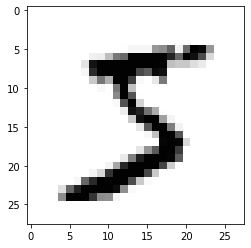

In [6]:
plt.imshow(primer_digito.reshape(28,28), cmap="Greys")

Para acelerar el ejercicio, vamos a tomar una muestra al azar de 10,000 observaciones.

In [7]:
import numpy as np
sample_size = 10000
np.random.seed(42)
random_sample_index = np.random.randint(0, mnist_data.shape[0], sample_size)
random_sample_index

array([56422, 15795,   860, ...,  9484,  5495, 28481])

Esto quiere decir que ahora la primera observación de nuestra nueva tabla era la observación número 56,422 de la tabla original, la segunda observación era la 15,795 y así sucesivamente.

In [8]:
mnist_muestra_pixeles = mnist_data[random_sample_index]
mnist_muestra_clase = mnist_target[random_sample_index]

Usa PCA para reducir la dimensionalidad del dataset (mnist_muestra_pixeles) y usa el nuevo dataset como datos de entrenamiento para un clasificador que clasifique correctamente las imagenes. El criterio de evaluacion tiene que ser el criterio F1. Hay varias formas de usar el criterio F1 para casos de multiclase (en este caso hay 10 clases, del número 0 al 9).

Primero tenemos que evaluar como es la distribucion de las clases objetivo:

In [9]:
pd.Series(mnist_muestra_clase).value_counts(True)

1    0.1158
7    0.1036
2    0.1022
6    0.1017
8    0.1009
9    0.0989
4    0.0977
3    0.0961
0    0.0953
5    0.0878
dtype: float64

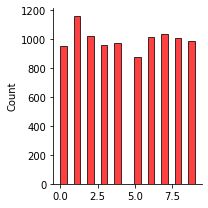

In [10]:
# Visualizamos gráficamente esta proporción
import seaborn as sns
sns.displot(mnist_muestra_clase, height=3, color='red')

Vemos que no hay imbalance de clases, asi que podemos usar el criterio micro de F1.

In [11]:
from sklearn.decomposition import PCA

Elegimos reducir la dimensionalidad pero mantener un 80% de la varianza

In [12]:
# Creamos el modelo
pca = PCA(0.8)

In [13]:
# Hacemos el ajuste
mnist_pca = pca.fit_transform(mnist_muestra_pixeles)

In [14]:
# Vemos la forma
mnist_pca.shape

(10000, 43)

Observamos que las columnas se redujeron a solamente 43, en lugar de las 28x28=784 columnas que teníamos originalmente. Es decir, tomando estas nuevas 43 columnas podemos describir el 80% de la varianza de la tabla original.

Ahora creamos el estimador, vamos a usar el clasificador KNN, aunque un clasificador de Regresión logística no sería mala idea, dado que la dimensionalidad no es muy alta.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint as sp_randint

clf = KNeighborsClassifier()

busqueda_dist_parametros = {
    "n_neighbors": sp_randint(2,10),
    "p": sp_randint(1,3),
    "weights": ["uniform", "distance"]
}

Ahora realizamos la búsqueda aleatoria.

In [16]:
from sklearn.model_selection import RandomizedSearchCV

busqueda = RandomizedSearchCV(estimator=clf,
                             param_distributions=busqueda_dist_parametros,
                             n_iter=10,
                             cv=3,
                             n_jobs=-1,
                             scoring="f1_micro")
busqueda.fit(X=mnist_pca, y=mnist_muestra_clase)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C1D718F70>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C1D727070>,
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_micro')

In [17]:
# Mostramos la mejor evaluación
busqueda.best_score_

0.9589995592240688

In [18]:
# Mostramos los mejores parámetros
busqueda.best_params_

{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

Es decir, el modelo que funcionó mejor fue aquél que tiene un número de vecinos más cercanos igual a 6, medido con la distancia 2 y con el parámetros de pesos igual a distancias.

In [19]:
# Creamos el modelo con los parámetros más óptimos y ajustamos

mejores_params = {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
clusterer = KNeighborsClassifier(**mejores_params)

clusterer.fit(mnist_pca, mnist_muestra_clase)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [20]:
# Hacemos las predicciones
clusterer.predict(mnist_pca)

array([4, 0, 0, ..., 2, 6, 9], dtype=uint8)

Procedemos a determinar si las primeras 3 predicciones fueron las correctas.

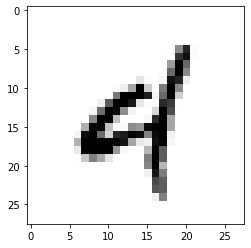

In [21]:
primera_observacion = mnist_data[56422]
plt.imshow(primera_observacion.reshape(28,28), cmap="Greys")

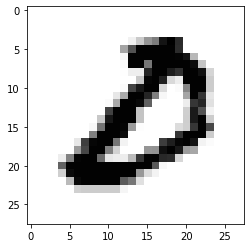

In [22]:
segunda_observacion = mnist_data[15795]
plt.imshow(segunda_observacion.reshape(28,28), cmap="Greys")

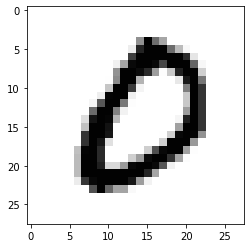

In [23]:
tercera_observacion = mnist_data[860]
plt.imshow(tercera_observacion.reshape(28,28), cmap="Greys")

En efecto, las primeras 3 predicciones fueron correctas.

Por último, procedemos a realizar la validación cruzada para determinar qué tan eficaz fue el modelo.

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(clusterer, X=mnist_muestra_pixeles, y=mnist_muestra_clase, cv=3, scoring='f1_micro').mean()

0.9496999190020982

En conclusión, aún después de haber reducido el número de columnas de 784 a sólo 43, observamos que en realidad no hubo pérdida significativa de información. El modelo obtuvo casi 95% de efectividad, lo cual es excelente.